In [1]:
%load_ext autoreload
import sys
sys.path.append("..")

In [288]:
%autoreload

import numpy as np
import pickle

import main


import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc_file('matplotlibrc')

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [10,10]


import darkhistory.physics as phys
import darkhistory.utilities as utils
import darkhistory.spec.transferfunction as tf
import darkhistory.spec.spectools as spectools

from darkhistory.spec.spectrum import Spectrum

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec
from darkhistory.electrons.elec_cooling import get_elec_cooling_tf_fast

from darkhistory.electrons import positronium

from scipy.interpolate import interp1d


In [117]:
test = positronium.weighted_photon_spec(photeng)
print(test.toteng()/phys.me)

2.000000000081069


# Marching Up Algorithm

In [3]:
ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf = main.load_ics_data()


********* Thomson regime scattered photon spectrum *********
Initializing...
Computing spectra by an expansion in beta...
----> Computation by expansion in beta complete!
Computing spectra by analytic series...
*** Computing series 1/12...
*** Computing series 2/12...
*** Computing series 3/12...
*** Computing series 4/12...
*** Computing series 5/12...
*** Computing series 6/12...
*** Computing series 7/12...
*** Computing series 8/12...
*** Computing series 9/12...
*** Computing series 10/12...
*** Computing series 11/12...
*** Computing series 12/12...
----> Computation by analytic series complete!
Spectrum computed!
********* Relativistic regime scattered photon spectrum *********
Initializing...
Computing series 1/4...
Computing series 2/4...
Computing series 3/4...
Computing series 4/4...
Relativistic Computation Complete!
********* Thomson regime energy loss spectrum *********
Computing nonrelativistic energy loss spectrum...
Computing energy loss spectrum by beta expansion...
C

In [252]:
pickle.dump(ics_thomson_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_thomson_ref_tf.raw", "wb"))
pickle.dump(ics_rel_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/ics_rel_ref_tf.raw", "wb"))
pickle.dump(engloss_ref_tf, open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/tflists/ics/engloss_ref_tf.raw", "wb"))

In [289]:
eleceng = 10**np.arange(0, np.log10(5e12), 0.0254)
photeng = 10**np.arange(-4, np.log10(5e12), 0.0334)


rs = 600
xe = .01

test_nB = get_elec_cooling_tf_fast(
    ics_thomson_ref_tf, ics_rel_ref_tf, engloss_ref_tf,
    eleceng, photeng, rs, xe, xHe=0, check_conservation_eng=True, verbose=True
)

***************************************************
rs:  600
injected energy:  3018.5613014197993
Energy in low energy electrons:  2901.852478927338
Energy in photons:  2689.608166251477
Continuum_engloss:  2647.716839442689
Energy in photons - Continuum:  41.89132680878811
Deposited in ionization:  40.38844151962926
Deposited in excitation:  28.02771738581055
Deposited in heating:  6.460473298242648
Energy is conserved up to (%):  -0.0019590962085588894
Deposited in ICS:  -0.059136520008484246
Energy conservation with deposited (%):  -2.1762421206016872e-14
***************************************************
***************************************************
rs:  600
injected energy:  3200.368594586517
Energy in low energy electrons:  2964.2361521465746
Energy in photons:  5421.598177182115
Continuum_engloss:  5334.525262067376
Energy in photons - Continuum:  87.07291511473886
Deposited in ionization:  80.43437590491257
Deposited in excitation:  55.90884860486322
Deposited in heating

***************************************************
rs:  600
injected energy:  35204.64748894213
Energy in low energy electrons:  7460.74822918678
Energy in photons:  293339.26519478846
Continuum_engloss:  270029.31269453734
Energy in photons - Continuum:  23309.952500251122
Deposited in ionization:  2350.393014106028
Deposited in excitation:  1736.3008493741563
Deposited in heating:  353.1496755819325
Energy is conserved up to (%):  -0.016750003134561563
Deposited in ICS:  -5.896779557873129
Energy conservation with deposited (%):  -1.0233643512440342e-13
***************************************************
***************************************************
rs:  600
injected energy:  37325.015779572066
Energy in low energy electrons:  7568.548454798597
Energy in photons:  304837.49279381055
Continuum_engloss:  279614.6733238883
Energy in photons - Continuum:  25222.81946992228
Deposited in ionization:  2402.291521670988
Deposited in excitation:  1776.5682370029124
Deposited in heating

***************************************************
rs:  600
injected energy:  203516.67563669104
Energy in low energy electrons:  9701.248491728118
Energy in photons:  747790.7751206969
Continuum_engloss:  560502.2750168927
Energy in photons - Continuum:  187288.50010380417
Deposited in ionization:  3423.450162477961
Deposited in excitation:  2588.035298130618
Deposited in heating:  527.665593360942
Energy is conserved up to (%):  -0.0060063937131932576
Deposited in ICS:  -12.224012810601614
Energy conservation with deposited (%):  -6.904094003942543e-14
***************************************************
***************************************************
rs:  600
injected energy:  215774.44091526646
Energy in low energy electrons:  9741.924840159729
Energy in photons:  768987.5833299195
Continuum_engloss:  569521.0310875046
Energy in photons - Continuum:  199466.5522424149
Deposited in ionization:  3442.8543176822773
Deposited in excitation:  2603.9056584306945
Deposited in heating:

***************************************************
rs:  600
injected energy:  518800.038928961
Energy in low energy electrons:  10155.02204829721
Energy in photons:  1193413.3443024196
Continuum_engloss:  691739.8353148083
Energy in photons - Continuum:  501673.5089876113
Deposited in ionization:  3639.8231667457617
Deposited in excitation:  2766.654352801044
Deposited in heating:  580.118217868289
Energy is conserved up to (%):  -0.002908219589540768
Deposited in ICS:  -15.08784436218038
Energy conservation with deposited (%):  -9.575822667644283e-14
***************************************************
***************************************************
rs:  600
injected energy:  550047.252867634
Energy in low energy electrons:  10171.698626720088
Energy in photons:  1231737.1444886336
Continuum_engloss:  698850.1220327016
Energy in photons - Continuum:  532887.022455932
Deposited in ionization:  3647.771437379804
Deposited in excitation:  2773.3042217696748
Deposited in heating:  582

***************************************************
rs:  600
injected energy:  1322513.1530409441
Energy in low energy electrons:  10319.687029208297
Energy in photons:  2091951.3048359938
Continuum_engloss:  786905.0447836419
Energy in photons - Continuum:  1305046.2600523517
Deposited in ionization:  3718.2948102500554
Deposited in excitation:  2832.806456753872
Deposited in heating:  613.2694203448292
Energy is conserved up to (%):  -0.0012978871269011488
Deposited in ICS:  -17.164727963755688
Energy conservation with deposited (%):  -8.598905353355493e-14
***************************************************
***************************************************
rs:  600
injected energy:  1402167.8337057582
Energy in low energy electrons:  10324.654797951116
Energy in photons:  2176196.654475702
Continuum_engloss:  791506.5138020761
Energy in photons - Continuum:  1384690.1406736257
Deposited in ionization:  3720.661895977471
Deposited in excitation:  2834.8263601187673
Deposited in hea

***************************************************
rs:  600
injected energy:  3371320.1787284347
Energy in low energy electrons:  10363.760724290505
Energy in photons:  4196947.836900086
Continuum_engloss:  843195.2078846614
Energy in photons - Continuum:  3353752.6290154248
Deposited in ionization:  3739.2949364159463
Deposited in excitation:  2850.838917225632
Deposited in heating:  632.0491317869836
Energy is conserved up to (%):  -0.0005456021894605473
Deposited in ICS:  -18.393996710392045
Energy conservation with deposited (%):  4.5218767686084355e-14
***************************************************
***************************************************
rs:  600
injected energy:  3574374.062644804
Energy in low energy electrons:  10364.881579903838
Energy in photons:  4402422.171612294
Continuum_engloss:  845618.5316260215
Energy in photons - Continuum:  3556803.639986273
Deposited in ionization:  3739.8289941215844
Deposited in excitation:  2851.3026034220484
Deposited in heati

***************************************************
rs:  600
injected energy:  18382306.368835278
Energy in low energy electrons:  10374.598226951159
Energy in photons:  19237753.993506134
Continuum_engloss:  873047.9223912605
Energy in photons - Continuum:  18364706.07111487
Deposited in ionization:  3744.4587430243046
Deposited in excitation:  2855.3551891028874
Deposited in heating:  644.9328892520348
Energy is conserved up to (%):  -0.00010361772641808979
Deposited in ICS:  -19.047327918180322
Energy conservation with deposited (%):  -2.4014993321001655e-14
***************************************************
***************************************************
rs:  600
injected energy:  19489468.698620453
Energy in low energy electrons:  10374.64929290609
Energy in photons:  20344916.176548224
Continuum_engloss:  873048.0597854618
Energy in photons - Continuum:  19471868.11676276
Deposited in ionization:  3744.4830751582795
Deposited in excitation:  2855.376880139741
Deposited in he

***************************************************
rs:  600
injected energy:  100230523.80778983
Energy in low energy electrons:  10375.062332822734
Energy in photons:  101085969.00405574
Continuum_engloss:  873049.1641501365
Energy in photons - Continuum:  100212919.8399056
Deposited in ionization:  3744.6798987609573
Deposited in excitation:  2855.5534679160983
Deposited in heating:  647.7200645243054
Energy is conserved up to (%):  -1.900407088974986e-05
Deposited in ICS:  -19.047879810788945
Energy conservation with deposited (%):  1.3158621948976058e-14
***************************************************
***************************************************
rs:  600
injected energy:  106267386.5402462
Energy in low energy electrons:  10375.064291719948
Energy in photons:  107122831.70075804
Continuum_engloss:  873049.169526991
Energy in photons - Continuum:  106249782.53123105
Deposited in ionization:  3744.6808321013664
Deposited in excitation:  2855.5543179699876
Deposited in hea

***************************************************
rs:  600
injected energy:  287210292.9797832
Energy in low energy electrons:  10375.078200431297
Energy in photons:  288065737.75351346
Continuum_engloss:  873049.2065137379
Energy in photons - Continuum:  287192688.5469997
Deposited in ionization:  3744.687460916216
Deposited in excitation:  2855.5603814633623
Deposited in heating:  648.1548219648128
Energy is conserved up to (%):  -6.632102603910928e-06
Deposited in ICS:  -19.04808130608099
Energy conservation with deposited (%):  -4.641690337809882e-15
***************************************************
***************************************************
rs:  600
injected energy:  304508906.69742167
Energy in low energy electrons:  10375.07845292153
Energy in photons:  305364351.45779353
Continuum_engloss:  873049.2071536821
Energy in photons - Continuum:  304491302.25063986
Deposited in ionization:  3744.6875813011115
Deposited in excitation:  2855.560492404474
Deposited in heatin

***************************************************
rs:  600
injected energy:  1393156802.9453034
Energy in low energy electrons:  10375.080439399437
Energy in photons:  1394012247.5281541
Continuum_engloss:  873049.2121921271
Energy in photons - Continuum:  1393139198.315962
Deposited in ionization:  3744.6885284530263
Deposited in excitation:  2855.5613692514553
Deposited in heating:  648.3473724198368
Energy is conserved up to (%):  -1.3672809872720905e-06
Deposited in ICS:  -19.048368810111544
Energy conservation with deposited (%):  5.172086211196499e-14
***************************************************
***************************************************
rs:  600
injected energy:  1477066335.3378193
Energy in low energy electrons:  10375.080451131194
Energy in photons:  1477921779.9177146
Continuum_engloss:  873049.2122219357
Energy in photons - Continuum:  1477048730.7054927
Deposited in ionization:  3744.6885340469717
Deposited in excitation:  2855.561374484501
Deposited in he

***************************************************
rs:  600
injected energy:  6373823014.383458
Energy in low energy electrons:  10375.080543517299
Energy in photons:  6374678458.924806
Continuum_engloss:  873049.2124568055
Energy in photons - Continuum:  6373805409.712349
Deposited in ionization:  3744.688578099345
Deposited in excitation:  2855.561415854907
Deposited in heating:  648.389160311402
Energy is conserved up to (%):  -2.988565660077205e-07
Deposited in ICS:  -19.0485897733852
Energy conservation with deposited (%):  1.865738999651084e-14
***************************************************
***************************************************
rs:  600
injected energy:  6757716993.552843
Energy in low energy electrons:  10375.0805441534
Energy in photons:  6758572438.09359
Continuum_engloss:  873049.2124584245
Energy in photons - Continuum:  6757699388.881131
Deposited in ionization:  3744.688578402667
Deposited in excitation:  2855.5614161422154
Deposited in heating:  648.38

***************************************************
rs:  600
injected energy:  39066094834.59355
Energy in low energy electrons:  10375.080549441398
Energy in photons:  39066950279.12393
Continuum_engloss:  873049.2124718942
Energy in photons - Continuum:  39066077229.91146
Deposited in ionization:  3744.6885809242754
Deposited in excitation:  2855.5614185395766
Deposited in heating:  648.4005381764808
Energy is conserved up to (%):  -4.876094759194796e-08
Deposited in ICS:  -19.048981955415453
Energy conservation with deposited (%):  -4.114335324191788e-14
***************************************************
***************************************************
rs:  600
injected energy:  41419037262.21012
Energy in low energy electrons:  10375.080549463812
Energy in photons:  41419892706.74034
Continuum_engloss:  873049.2124719513
Energy in photons - Continuum:  41419019657.52787
Deposited in ionization:  3744.688580934963
Deposited in excitation:  2855.5614185498334
Deposited in heating

Energy conservation with deposited (%):  2.0617808486726104e-14
***************************************************
***************************************************
rs:  600
injected energy:  200909281260.87238
Energy in low energy electrons:  10375.080549660164
Energy in photons:  200910136705.40082
Continuum_engloss:  873049.212472453
Energy in photons - Continuum:  200909263656.18835
Deposited in ionization:  3744.6885810286003
Deposited in excitation:  2855.5614186400153
Deposited in heating:  648.4033233128258
Energy is conserved up to (%):  -9.48181077273584e-09
Deposited in ICS:  -19.04984901357489
Energy conservation with deposited (%):  5.544569804849683e-15
***************************************************
***************************************************
rs:  600
injected energy:  213010003741.12524
Energy in low energy electrons:  10375.080549661567
Energy in photons:  213010859185.65366
Continuum_engloss:  873049.2124724564
Energy in photons - Continuum:  2130099861

***************************************************
rs:  600
injected energy:  1033237119493.6274
Energy in low energy electrons:  10375.080549674656
Energy in photons:  1033237974938.1548
Continuum_engloss:  873049.2124724897
Energy in photons - Continuum:  1033237101888.9423
Deposited in ionization:  3744.688581035512
Deposited in excitation:  2855.561418646755
Deposited in heating:  648.404776808673
Energy is conserved up to (%):  -1.8437357576220472e-09
Deposited in ICS:  -19.050599512634633
Energy conservation with deposited (%):  4.232131214944061e-14
***************************************************
***************************************************
rs:  600
injected energy:  1095468767333.9965
Energy in low energy electrons:  10375.080549674738
Energy in photons:  1095469622778.5238
Continuum_engloss:  873049.2124724903
Energy in photons - Continuum:  1095468749729.3113
Deposited in ionization:  3744.688581035549
Deposited in excitation:  2855.5614186467924
Deposited in heat

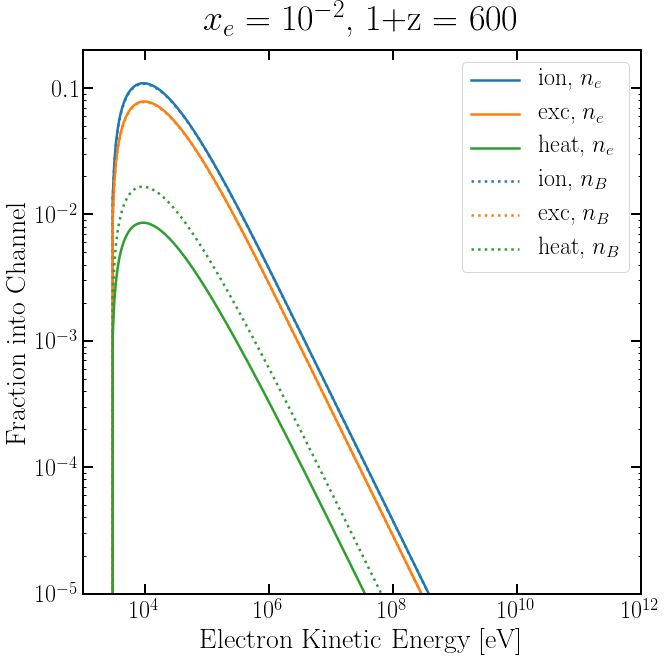

In [287]:
plt.figure()

ax = plt.gca()
ax.loglog()

plt.xlabel('Electron Kinetic Energy [eV]')
plt.ylabel('Fraction into Channel')
plt.title(r'$x_e = 10^{-2}$, 1+z = 600')

plt.axis([1e3, 1e12, 1e-5, 0.2])

plt.plot(eleceng, b_ne[2]/eleceng, label=r'ion, $n_e$', color='C0')
plt.plot(eleceng, b_ne[3]/eleceng, label=r'exc, $n_e$', color='C1')
plt.plot(eleceng, b_ne[4]/eleceng, label=r'heat, $n_e$', color='C2')
plt.plot(eleceng, b_nB[2]/eleceng, label=r'ion, $n_B$', color='C0', linestyle=':')
plt.plot(eleceng, b_nB[3]/eleceng, label=r'exc, $n_B$', color='C1', linestyle=':')
plt.plot(eleceng, b_nB[4]/eleceng, label=r'heat, $n_B$', color='C2', linestyle=':')

plt.legend()

In [275]:
?plt.xlabel